# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer:<p>
400

#### Question 2. Create a summary table

In [4]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer:<p>
The underlying data for these two measures is very different.  GRE scores are three digit integers ranging (in this dataset) from 220 to 800.  GPA scores range from 0.00 to 4.00.  

#### Question 4. Drop data points with missing data


In [5]:
df_no_missing = df_raw.dropna()
df_no_missing.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Re-run the "describe" method and check that all the counts are now the same and equal to or lower than the lowest of the counts from the original data.   

In [6]:
df_no_missing.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [7]:
null_data = df_raw[df_raw.isnull().any(axis=1)]
null_data

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


#### Question 6. Create box plots for GRE and GPA

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

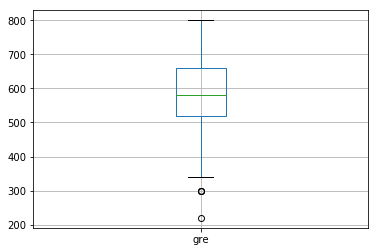

In [9]:
#boxplot 1
df_no_missing.boxplot(column='gre')


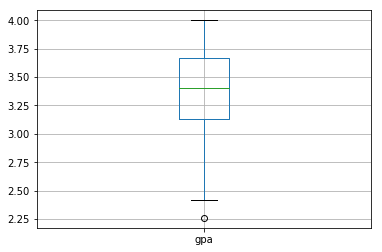

In [10]:
#boxplot 2 
df_no_missing.boxplot(column='gpa')

#### Question 7. What do these plots show?

Answer: Both of them have outliers on the low end.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C427080>]], dtype=object)

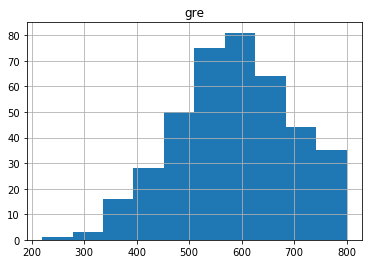

In [11]:
# plot the distribution of each variable 
df_no_missing.hist(column="gre")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D11B8D0>]], dtype=object)

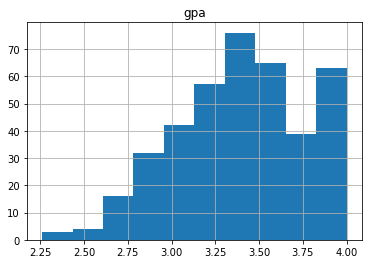

In [12]:
df_no_missing.hist(column="gpa")

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, these are not symmetrical. [INSTRUCTOR: While strictly true, in practice this is assumed to be normal with possible correction for skew]

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Not sure I understand this one. [INSTRUCTOR: The data does not need correction!]

#### Question 11. Which of our variables are potentially colinear? 

In [13]:
# create a correlation matrix for the data
df_no_missing.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Possibly GRE and GPA, though the correlation coefficient between these two is only .38. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: An example: 1) Do a crude analysis with the following model P(admit = 1) = alpha + beta(prestige) 2) Repeat controlling for gre and gpa

#### Question 14. What is your hypothesis? 

Answer: A student's GRE or GPA is associated with the likelihood of being admitted to graduate school.  Prestige seems to be negatively correlated, but I think this is because the numbers we're using are "reversed" in the sense that a higher level of prestige is noted by a lower number.  

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data